# Least Square Method

对于训练集$T = \{(x_i, y_i) ...(x_m, y_m\}$

拟合出假设函数(hypothesis function) $h(x)$

一般的h(x)为n次的多项式，$h(x)=w_0+w_1x+w_2x^2+...w_nx^n=\frac{1}{2}\sum_{i=1}^nw_jx^j$

$w = (w_0,w_1,w_2,...,w_n)^T$为参数

有误差，即残差（residual）：$r_i=h(x_i)-y_i$

残差平方和最小时，h(x) 和 y 拟合度最高

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得经验风险
$\frac{1}{2}\sum_{i=1}^m(h(x_i)-y_i)^2$ (残差平方和，系数1/2是为了计算方便) 最小

即，求 $min\frac{1}{2}\sum_{i=1}^n(h(x_i)-y_i)^2$

最小二乘法（LSE）与极大似然估计（MLE）是等价的

----

In [1]:
import numpy as np;
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

任务：生成一个目标函数$y=sin2{\pi}x$，并加上一个服从高斯分布的噪声，用多项式去拟合

 ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x);

# 多项式
def fit_func(w, x):
    # w为多项式系数
    f = np.poly1d(w)
    return f(x);

# 残差
def residuals_func(w, x, y):
    # p为多项式系数
    ret = fit_func(w, x) - y;
    return ret;

生成目标函数，以及数据集（带有噪声的十个点）

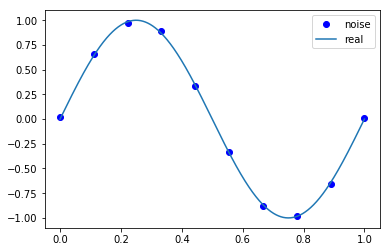

In [3]:
# np.linspace(tart, stop, num) 可以返回在指定的区间内均匀间隔的数字
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

y = real_func(x)
y = [np.random.normal(0, 0.01)+y1 for y1 in y]

plt.plot(x, y, 'bo', label='noise')
plt.plot(x_points, real_func(x_points), label='real')
plt.legend()

利用数据集（带有噪声的十个点）得到多项式参数，并用多项式拟合目标函数

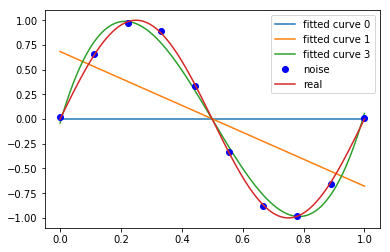

In [4]:
def fitting(x ,y ,n):
    # 随机设定参数w的初始值
    w_init = np.random.rand(n+1)
    # leastsq(func, w_init, args) 可以求出想要拟合的函数的参数
    w_lsq = leastsq(residuals_func, w_init, args=(x,y))
    return w_lsq
    
w_lsq_0 = fitting(x, y, n=0)
plt.plot(x_points, fit_func(w_lsq_0[0],x_points), label='fitted curve 0')

w_lsq_1 = fitting(x, y, n=1)
plt.plot(x_points, fit_func(w_lsq_1[0],x_points), label='fitted curve 1')

w_lsq_3 = fitting(x, y, n=3)
plt.plot(x_points, fit_func(w_lsq_3[0],x_points), label='fitted curve 3')

plt.plot(x, y, 'bo', label='noise')
plt.plot(x_points, real_func(x_points), label='real')
plt.legend()

## 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

回归问题中，损失函数是平方损失，正则化可以是参数向量的L1范数,也可以是L2范数。

$Q(x)=\frac{1}{N}\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||$。

$Q(x)=\frac{1}{N}\sum_{i=1}^n(h(x_i)-y_i)^2+\frac{\lambda}{2}||w||^2$。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

假设参数w的先验分布满足$N(0, \sigma^2)$

则 LSE+L2 regularization 与最大后验估计（MAP）是等价的

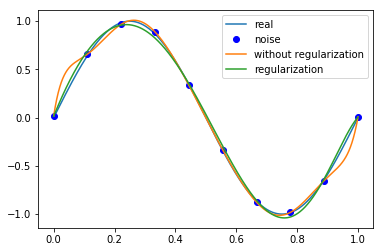

In [6]:
def residuals_func_regularization(w, x, y):
    regularization = 0.0001
    ret = fit_func(w, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(w)))
    return ret

def fitting_regularization(x ,y, n):
    w_init = np.random.rand(n+1)
    w_lsq = leastsq(residuals_func_regularization, w_init, args=(x,y))
    return w_lsq

plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x, y, 'bo', label='noise')

w_lsq_9 = fitting(x, y, n=9)
plt.plot(x_points, fit_func(w_lsq_9[0], x_points), label='without regularization')

w_lsq_regularization = fitting_regularization(x, y, n=9)
plt.plot(x_points, fit_func(w_lsq_regularization[0], x_points), label='regularization')

plt.legend()